In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
style.use('dark_background')
from IPython.display import clear_output
from copy import copy, deepcopy
from tqdm import tqdm_notebook as tm
from tqdm import trange
from glob import glob
import os
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [3]:
import pandas as pd
import kts
from kts import *
features
helpers
features.define_in_scope(globals())
helpers.define_in_scope(globals())
train = kts.load('train')

[photo_urls, embeddings, has_embedding, hate_index, is_leader_v1, leader_type_v0]

[get_df_input, run_sql, get_uid, get_photo_urls, download_img, write_embedding, get_embedding, get_conn, compute_hate_index, multiclass_accuracy]

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

@helper
def multiclass_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred.argmax(axis=1))

kf = KFold(3, True, 42)
val_stack, fc_stack = kts.stack(['36D789'], inner_splitter=kf)
val_stack.metric = multiclass_accuracy

In [5]:
fs_stack_1 = FeatureSet([embeddings, has_embedding, hate_index, fc_stack, leader_type_v0],
                  df_input=train,
                  target_column="leader_type",
                  description="Same features + 1st lvl model preds"
                 )

In [6]:
fs_stack_1[:10]

,face_0,face_1,face_2,face_3,face_4,face_5,face_6,face_7,face_8,face_9,...,face_122,face_123,face_124,face_125,face_126,face_127,has_embedding,hate_index,36D789,leader_type
uid,,,,,,,,,,,,,,,,,,,,,
311546938,-0.099450,0.010830,0.006852,-0.107938,-0.177722,-0.008999,-0.019245,-0.077893,0.119250,-0.131279,...,-0.173640,-0.135180,0.088179,-0.047529,0.001416,0.100528,False,2076.979587,0.236748,2
296370791,-0.070700,0.092762,0.059397,-0.091843,-0.100401,-0.049898,0.059487,-0.075972,0.234744,-0.142270,...,-0.205837,-0.058284,0.109828,0.031623,0.018111,0.033240,False,1975.805273,0.231773,0
305944914,-0.163063,0.044716,0.035406,-0.009309,-0.148827,-0.076811,-0.000453,-0.070838,0.140655,-0.087447,...,-0.057830,-0.090472,0.156128,-0.006754,0.127599,0.100852,False,2039.632760,0.235300,2
299988557,-0.078660,0.092395,0.153398,-0.031116,-0.182841,0.054973,0.027764,-0.055431,0.059075,-0.059360,...,-0.140810,-0.052822,0.087513,-0.074902,0.009909,-0.039475,False,1999.923713,0.221581,2
313685503,-0.031664,0.089647,0.092147,-0.086997,-0.162621,-0.036758,-0.003765,-0.099746,0.178013,-0.085900,...,-0.113466,-0.056637,0.061955,-0.132126,-0.003893,0.049012,False,2091.236687,0.242202,0
301059313,-0.063703,0.105731,0.074627,-0.043190,-0.133668,-0.043213,0.008353,-0.123254,0.039325,-0.018337,...,-0.101941,-0.119844,0.135039,-0.060112,0.032906,0.073206,False,2007.062087,0.232743,0
316323960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2108.826400,0.226420,2
307714904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2051.432693,0.226420,1
326498214,-0.032285,0.036174,0.000839,-0.089840,-0.103317,0.007911,0.070721,-0.085391,0.236312,-0.112465,...,-0.199774,-0.032617,0.073189,-0.058393,-0.027006,0.025247,False,2176.654760,0.240632,2


In [7]:
cb = zoo.c.CatBoostClassifier(iterations=50, task_type="GPU", loss_function="MultiClass")
val_stack.score(cb, fs_stack_1, 'demo stacking', verbose=25)


0:	learn: -1.0981874	test: -1.0985330	best: -1.0985330 (0)	total: 7.24ms	remaining: 355ms
25:	learn: -1.0882047	test: -1.0984777	best: -1.0984116 (13)	total: 168ms	remaining: 155ms
49:	learn: -1.0790440	test: -1.0989129	best: -1.0983974 (30)	total: 377ms	remaining: 0us
bestTest = -1.098397358
bestIteration = 30
Shrink model to first 31 iterations.


0:	learn: -1.0982560	test: -1.0985829	best: -1.0985829 (0)	total: 7ms	remaining: 343ms
25:	learn: -1.0884187	test: -1.0989041	best: -1.0985681 (1)	total: 761ms	remaining: 702ms
49:	learn: -1.0792100	test: -1.0992925	best: -1.0985681 (1)	total: 1.44s	remaining: 0us
bestTest = -1.098568062
bestIteration = 1
Shrink model to first 2 iterations.


0:	learn: -1.0981037	test: -1.0986477	best: -1.0986477 (0)	total: 9.21ms	remaining: 451ms
25:	learn: -1.0873751	test: -1.0989171	best: -1.0986477 (0)	total: 1.13s	remaining: 1.04s
49:	learn: -1.0777209	test: -1.0992976	best: -1.0986477 (0)	total: 1.52s	remaining: 0us
bestTest = -1.098647676
bestIteration = 0
Shrink model to first 1 iterations.


0:	learn: -1.0982575	test: -1.0986032	best: -1.0986032 (0)	total: 261ms	remaining: 12.8s
25:	learn: -1.0886755	test: -1.0989760	best: -1.0985708 (1)	total: 1.25s	remaining: 1.16s
49:	learn: -1.0796145	test: -1.0989230	best: -1.0985708 (1)	total: 1.74s	remaining: 0us
bestTest = -1.098570844
bestIteration = 1
Shrink model to first 2 iterations.


0:	learn: -1.0981750	test: -1.0985468	best: -1.0985468 (0)	total: 22.1ms	remaining: 1.08s
25:	learn: -1.0877408	test: -1.0985102	best: -1.0985069 (23)	total: 1.64s	remaining: 1.52s
49:	learn: -1.0782066	test: -1.0986236	best: -1.0984967 (32)	total: 2.08s	remaining: 0us
bestTest = -1.09849674
bestIteration = 32
Shrink model to first 33 iterations.


0:	learn: -1.0981296	test: -1.0986145	best: -1.0986145 (0)	total: 20.9ms	remaining: 1.02s
25:	learn: -1.0872358	test: -1.0990316	best: -1.0985813 (1)	total: 955ms	remaining: 881ms
49:	learn: -1.0780401	test: -1.0999758	best: -1.0985813 (1)	total: 2.05s	remaining: 0us
bestTest = -1.098581256
bestIteration = 1
Shrink model to first 2 iterations.


0:	learn: -1.0980531	test: -1.0985742	best: -1.0985742 (0)	total: 135ms	remaining: 6.6s
25:	learn: -1.0888334	test: -1.0988688	best: -1.0985742 (0)	total: 1.1s	remaining: 1.02s
49:	learn: -1.0794970	test: -1.0992766	best: -1.0985742 (0)	total: 2.26s	remaining: 0us
bestTest = -1.098574219
bestIteration = 0
Shrink model to first 1 iterations.


0:	learn: -1.0980971	test: -1.0987038	best: -1.0987038 (0)	total: 150ms	remaining: 7.36s
25:	learn: -1.0884109	test: -1.0996115	best: -1.0987038 (0)	total: 1.23s	remaining: 1.13s
49:	learn: -1.0801078	test: -1.1000850	best: -1.0987038 (0)	total: 2.44s	remaining: 0us
bestTest = -1.098703757
bestIteration = 0
Shrink model to first 1 iterations.


0:	learn: -1.0984020	test: -1.0985966	best: -1.0985966 (0)	total: 115ms	remaining: 5.62s
25:	learn: -1.0884559	test: -1.0987318	best: -1.0985960 (20)	total: 1.04s	remaining: 965ms
49:	learn: -1.0799004	test: -1.0995661	best: -1.0985960 (20)	total: 2.42s	remaining: 0us
bestTest = -1.098596048
bestIteration = 20
Shrink model to first 21 iterations.


0:	learn: -1.0982492	test: -1.0986448	best: -1.0986448 (0)	total: 69.7ms	remaining: 3.42s
25:	learn: -1.0876069	test: -1.0992183	best: -1.0985946 (1)	total: 1.29s	remaining: 1.19s
49:	learn: -1.0779407	test: -1.0997866	best: -1.0985946 (1)	total: 2.24s	remaining: 0us
bestTest = -1.098594612
bestIteration = 1
Shrink model to first 2 iterations.


0:	learn: -1.0982880	test: -1.0986171	best: -1.0986171 (0)	total: 6.16ms	remaining: 302ms
25:	learn: -1.0879087	test: -1.0991550	best: -1.0986171 (0)	total: 1.36s	remaining: 1.25s
49:	learn: -1.0790282	test: -1.0995073	best: -1.0986171 (0)	total: 1.67s	remaining: 0us
bestTest = -1.098617087
bestIteration = 0
Shrink model to first 1 iterations.


0:	learn: -1.0982578	test: -1.0985781	best: -1.0985781 (0)	total: 8.33ms	remaining: 408ms
25:	learn: -1.0875419	test: -1.0988505	best: -1.0984752 (7)	total: 749ms	remaining: 692ms
49:	learn: -1.0784022	test: -1.0990631	best: -1.0984752 (7)	total: 1.78s	remaining: 0us
bestTest = -1.098475198
bestIteration = 7
Shrink model to first 8 iterations.


0:	learn: -1.0981396	test: -1.0985566	best: -1.0985566 (0)	total: 154ms	remaining: 7.54s
25:	learn: -1.0873313	test: -1.0989331	best: -1.0984986 (1)	total: 974ms	remaining: 899ms
49:	learn: -1.0779363	test: -1.0996509	best: -1.0984986 (1)	total: 1.7s	remaining: 0us
bestTest = -1.098498607
bestIteration = 1
Shrink model to first 2 iterations.


0:	learn: -1.0980734	test: -1.0986643	best: -1.0986643 (0)	total: 6.92ms	remaining: 339ms
25:	learn: -1.0876159	test: -1.0995185	best: -1.0986243 (1)	total: 342ms	remaining: 316ms
49:	learn: -1.0788904	test: -1.1001456	best: -1.0986243 (1)	total: 1.1s	remaining: 0us
bestTest = -1.098624339
bestIteration = 1
Shrink model to first 2 iterations.


0:	learn: -1.0982171	test: -1.0985659	best: -1.0985659 (0)	total: 223ms	remaining: 10.9s
25:	learn: -1.0886597	test: -1.0986406	best: -1.0985337 (18)	total: 734ms	remaining: 677ms
49:	learn: -1.0797511	test: -1.0990175	best: -1.0985337 (18)	total: 1.43s	remaining: 0us
bestTest = -1.09853372
bestIteration = 18
Shrink model to first 19 iterations.


0.3352219647047292

In [8]:
lb

,Score,std,Model,FS,Description,FS description,Model source,FS source,Splitter
ID,,,,,,,,,
36D789,0.604303,0.0032273,cb_ed9,fs_1,default catboost,Embeddings + fake hate index + leadership_target from csv,"CatBoostClassifier(loss_function='Logloss', task_type='GPU', eval_metric='AUC')","FeatureSet(fc_before=stl.concat([embeddings, has_embedding, hate_index, is_leader_v1]), fc_after=stl.empty_like, target_column='is_leader', group_column=None)","StratifiedKFold(n_splits=5, random_state=42, shuffle=True)"
9CE994,0.335222,0.0064297,cb_7af,fs_stack_1,demo stacking,Same features + 1st lvl model preds,"CatBoostClassifier(loss_function='MultiClass', task_type='GPU', iterations=50)","FeatureSet(fc_before=stl.concat([embeddings, has_embedding, hate_index, stl.stack(ids=['36D789']), leader_type_v0]), fc_after=stl.empty_like, target_column='leader_type', group_column=None)","Refiner(inner_splitter=KFold(n_splits=3, random_state=42, shuffle=True), outer_splitter=StratifiedKFold(n_splits=5, random_state=42, shuffle=True))"


,face_0,face_1,face_2,face_3,face_4,face_5,face_6,face_7,face_8,face_9,...,face_121,face_122,face_123,face_124,face_125,face_126,face_127,has_embedding,hate_index,36D789
0,0.000000,0.000000,0.000000,18.336343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.759722,0.612766,1.216276,1.178834,0.000000,0.421173,1.706738,1.968916,1.199523,1.187802,...,3.232553,1.105993,0.495521,0.000000,2.549509,0.000000,0.693565,0.0,0.530410,1.072795
2,0.000000,0.000000,0.000000,10.407089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,9.275985,0.000000,0.000000,0.000000,0.000000,0.000000,12.747552,...,0.000000,0.000000,3.461036,0.000000,0.000000,0.000000,2.824805,0.0,0.000000,11.125851
4,0.907134,1.657139,0.000000,0.179712,2.944633,0.000000,1.933721,2.337328,0.000000,0.000000,...,0.000000,4.456726,0.139250,0.216232,0.000000,0.428857,0.695338,0.0,0.704310,0.850191
5,0.000000,0.000000,0.000000,10.067372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.788196,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.299918
6,0.000000,0.000000,0.000000,9.199457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.046969,0.000000,0.000000,9.712832,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
7,0.000000,0.000000,0.837190,0.825321,0.566755,1.377582,0.000000,0.000000,0.000000,0.828770,...,0.707950,0.845728,3.783079,0.000000,1.437249,0.509020,0.000000,0.0,0.000000,0.000000
8,0.000000,0.000000,0.000000,5.053459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.836171,0.000000,14.769720,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9,0.000000,0.000000,0.000000,15.064958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.812411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


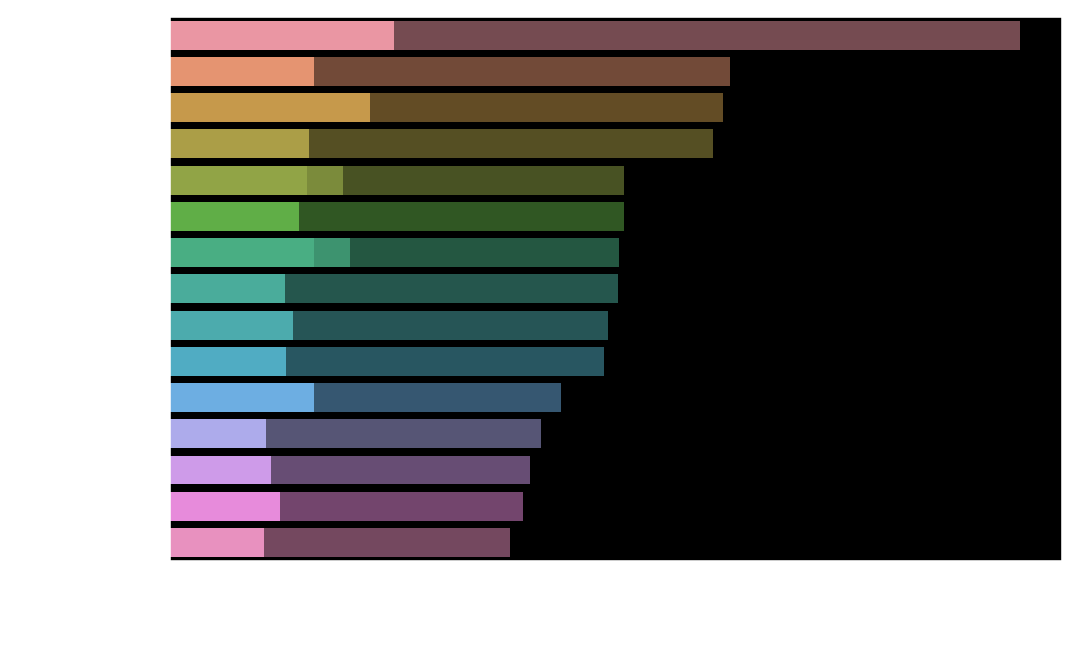

In [9]:
exp = lb['9CE994']

exp.feature_importances(plot=True)
exp.feature_importances()